<a href="https://colab.research.google.com/github/prince7027/DL-colab/blob/main/data_loading_balls_cv_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

On 14/03/2025 after almost 1.5 year of my last cv interview, i finally able to solve this with a good accuracy.

In [ ]:
# keras.utils load dataset
from keras.datasets import mnist
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#path of training and testing folders
train_data_dir = '/content/drive/MyDrive/balls_dataset/train'
test_data_dir = '/content/drive/MyDrive/balls_dataset/test'

In [ ]:
# https://keras.io/api/data_loading/
# for more data loading knowledge

In [ ]:
train=keras.utils.image_dataset_from_directory(directory=train_data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224))

Found 7449 files belonging to 15 classes.


In [ ]:
valid=keras.utils.image_dataset_from_directory(directory=test_data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224))

Found 1861 files belonging to 15 classes.


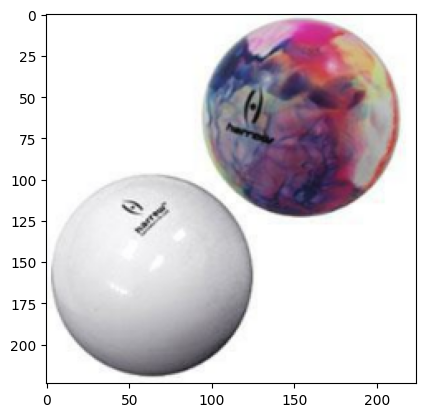

In [ ]:
import matplotlib.pyplot as plt

for image_batch, label_batch in train.take(1):
    # Convert to uint8 to avoid the warning (if the images are in [0, 255] range)
    plt.imshow(image_batch[0].numpy().astype('uint8'))  # Convert to uint8 type
    plt.show()


In [ ]:
train = train.map(lambda x, y: (x / 255.0, y))  # Ensure proper normalization


In [ ]:
valid = valid.map(lambda x, y: (x / 255.0, y))  # Ensure proper normalization


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Load EfficientNetB0 without the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3),classes=15)

# Freeze the base model
base_model.trainable = False

# Create the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(15, activation='softmax')  # 15 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │          19,215 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,068,786 (15.52 MB)

 Trainable params: 19,215 (75.06 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
model.fit(train, epochs=4, validation_data=valid,callbacks=[early_stopping] )

Epoch 1/4
233/233 ━━━━━━━━━━━━━━━━━━━━ 1247s 5s/step - accuracy: 0.5689 - loss: 1.5692 - val_accuracy: 0.8329 - val_loss: 0.6075
Epoch 2/4
233/233 ━━━━━━━━━━━━━━━━━━━━ 89s 186ms/step - accuracy: 0.8536 - loss: 0.5439 - val_accuracy: 0.8630 - val_loss: 0.4801
Epoch 3/4
233/233 ━━━━━━━━━━━━━━━━━━━━ 85s 199ms/step - accuracy: 0.8908 - loss: 0.4066 - val_accuracy: 0.8764 - val_loss: 0.4267
Epoch 4/4
233/233 ━━━━━━━━━━━━━━━━━━━━ 45s 193ms/step - accuracy: 0.9099 - loss: 0.3364 - val_accuracy: 0.8823 - val_loss: 0.3980


In [ ]:
history=model.evaluate(valid)

59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.8946 - loss: 0.3527


In [ ]:
# Model Evaluation
test_loss, test_acc = history
print(f'Test Accuracy: {test_acc}')


Test Accuracy: 0.8823213577270508
